## Example file for the isotopes module
This notebook presents how the isotopes.py module can be used to predict MS spectra of peptides, including some Post Translationnal Modifications

In [1]:
%matplotlib inline
import isotopes as iso

## peptides

straight pirmary sequences using 1 letter code is interpreted, a few PTM are available, check `iso.parse_peptide?` for more information

KEL0 = "KELCKAVSVSM"
KEL1 = "K+ELCKAVSVSM"  # + is for protonation
KEL2 = "KELCKAVS*VSM"  # * is for phosphorylation

In [2]:
iso.parse_peptide?

In [8]:
seq = "IEANPHILIPPE"
form = iso.parse(seq)

`iso.parse_peptide(seq)` returns a `Formula`, an object handling generic chemical formula.

It has a methods for computing masses and isotopic distribution, as well as printing itself :

In [9]:
print form

C_62 H_99 N_15 O_18


Average and monoisotopic peptide masses

assuming no charge

In [10]:
print form.average(), form.monoisotop()

1342.5415971 1341.7292514


Let's compute $m/z$ for varying level of protonation

In [11]:
m = form.monoisotop()
for i in range(1,5):
    print "Z=%d  M/Z = %f"%(i,(m+i)/i)

Z=1  M/Z = 1342.729251
Z=2  M/Z = 671.864626
Z=3  M/Z = 448.243084
Z=4  M/Z = 336.432313


`Formula` can be created easily with `iso.parse_formula()`

It is easy to a groupment to a given formula using `addformula()`

In [12]:
iso.addformula(form, iso.parse_formula("PO3"))
m = form.monoisotop()
for i in range(1,4):
    print "Z=%d  M/Z = %f"%(i,(m+i)/i)

Z=1  M/Z = 1421.687757
Z=2  M/Z = 711.343878
Z=3  M/Z = 474.562586


But the operation is wrong, because adding a phosphate requires removing a proton,

one way to do it :

In [9]:
seq = "KELCKAVS*VSM"
form = iso.parse_peptide(seq)
m = form.monoisotop()
for i in range(1,4):
    print "Z=%d  M/Z = %f"%(i,(m+i)/i)

Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165


Another, more convoluted way :

In [9]:
seq = "KELCKAVSVSM"
form = iso.parse_peptide(seq)
# fist add a full phosphate molecule
iso.addformula(form, iso.parse_formula("HPO4"))
# removing a groupement (here water group)
iso.rmformula(form, iso.parse_formula("H2O"))
m = form.monoisotop()
for i in range(1,5):
    print "Z=%d  M/Z = %f"%(i,(m+i)/i)
    

Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165
Z=4  M/Z = 318.891374


You can compute isotopic distribution, and even draw them

1271.565496  100.0000000000
1272.568326  62.1659202331
1273.568208  31.8682498442
1274.570865  11.7540338893
1275.573300  3.5990876805
1276.576674  0.9288049701
1277.580540  0.2076574523
1278.584857  0.0408578759
1279.589453  0.0071698298
1280.594258  0.0011355666
1281.599280  0.0001629043



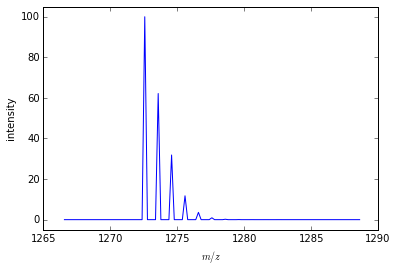

In [10]:
D = form.distribution()
print D
D.draw()

In [18]:
AA = "ACDEFGHIKLMNPQRSTVYW"
len(AA)
for a in AA:
    print a,iso.parse_peptide(a).monoisotop()

 A 89.0476784684
C 121.019749468
D 133.037507708
E 147.053157772
F 165.078978597
G 75.0320284043
H 155.069476542
I 131.094628661
K 146.105527698
L 131.094628661
M 149.051049597
N 132.053492125
P 115.063328533
Q 146.069142189
R 174.111675707
S 105.042593088
T 119.058243152
V 117.078978597
Y 181.073893216
W 204.089877634


In [14]:
a = iso.parse_peptide("A")

In [90]:
def findpep(mass, ppm=100.0):
    mcbound = iso.parse_formula("CONH").monoisotop()-iso.parse_formula("H2O").monoisotop()
    AA = [(a,iso.parse_peptide(a).monoisotop()-mcbound) for a in "ACDEFGHIKLMNPQRSTVYW"]
    AA.sort(key=lambda x: x[1])
    AA.insert(0,(' ',0))
    Gm = AA[1][1]
    Wm = AA[20][1]
    #print Gm, Wm, AA
    NMax = int(mass/Gm)  # maximum number of amino-acids
    precis = ppm*mass/1E6
    peplist = [0]*NMax
    print NMin, NMax, peplist
    for N in range(NMax):  # for all possible positions
        pepmass = sum( [ AA[p][1] for p in pl] )
        if pepmass > mass+1:
            break
        if abs(pepmass - mass) < precis:
            print "***", peplist, pepmass
        
#print iso.parse_peptide("GTW").monoisotop()
findpep(60,100)

0 1 [0]


NameError: global name 'pl' is not defined

In [59]:
AA = [(a,iso.parse_peptide(a).monoisotop()) for a in "ACDEFGHIKLMNPQRSTVYW"]


In [60]:
AA.sort(key=lambda x: x[1])

In [61]:
AA.insert(0,(' ',0))
AA

[(' ', 0),
 ('G', 75.03202840427),
 ('A', 89.04767846841),
 ('S', 105.04259308797),
 ('P', 115.06332853255),
 ('V', 117.07897859668999),
 ('T', 119.05824315211),
 ('C', 121.01974946841),
 ('I', 131.09462866083),
 ('L', 131.09462866083),
 ('N', 132.05349212484),
 ('D', 133.03750770753),
 ('Q', 146.06914218897998),
 ('K', 146.1055276977),
 ('E', 147.05315777167),
 ('M', 149.05104959669),
 ('H', 155.06947654215),
 ('F', 165.07897859668998),
 ('R', 174.1116757073),
 ('Y', 181.07389321624999),
 ('W', 204.08987763355998)]

In [80]:
%bookmark -l

Current bookmarks:
Capno -> /Users/mad/Desktop/Capno
MSpep -> /Users/mad/Documents/ mad/ en cours/python/isotope2


In [1]:
ls -lt

total 2168
-rw-r--r--@  1 mad  staff   33589 Dec 10 14:13 convolution.ipynb
-rw-r--r--   1 mad  staff    3452 Nov 29 16:53 Sumo-KELCKAV-papier.ipynb
-rw-r--r--   1 mad  staff   24890 Nov 29 16:48 MS peptides.ipynb
-rw-r--r--   1 mad  staff    8484 Oct 17 14:17 Untitled-Copy1.ipynb
-rw-r--r--   1 mad  staff   35586 Oct 17 14:16 Untitled0.ipynb
-rw-r--r--   1 mad  staff   15436 Oct 17 12:36 Sumo-KELCKAV.ipynb
-rw-r--r--   1 mad  staff   45584 Oct 17 12:35 EPI1.ipynb
-rw-r--r--   1 mad  staff   59681 Sep 27 16:21 Untitled.ipynb
-rw-r--r--   1 mad  staff   81233 Sep  6 15:09 example.ipynb
-rw-r--r--   1 mad  staff   26835 May 20  2016 isotopes.pyc
-rw-r--r--@  1 mad  staff   26737 May 20  2016 isotopes.py
drwxr-xr-x   4 mad  staff     136 Apr  8  2016 Peter/
-rw-r--r--   1 mad  staff    4947 Mar 31  2016 proteins.pyc
-rw-r--r--@  1 mad  staff    4039 Mar 31  2016 proteins.py
-rw-r--r--@  1 mad  staff     947 Jan  8  2016 insaturation.py
-rw-r--r--   1 mad  staff    5434 Oct  5  2015 FID.py

In [84]:
%load 'CAPNO v3.ipynb'

The text you're trying to load seems pretty big (338176 characters). Continue (y/[N]) ? N
Operation cancelled.


In [3]:
import proteins as p

In [15]:
pep = p.averagine(1850)

In [22]:
pep = iso.parse_peptide("ACDEFGHIKLMNPQ")
pep.monoisotop()

1601.73303353345

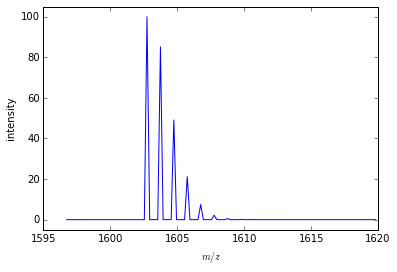

In [23]:
pep.distribution().draw()